# Getting Started with GPI PSFS

First let's set up our ipython environment. 

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 8.0)  # bigger plots by default. Adjust as desired
import matplotlib.pyplot as plt
import poppy

import gpipsfs

Populating the interactive namespace from numpy and matplotlib


## Some Basics of using gpipsfs

You can create an instance of the GPI object, and configure it based on the same obsmode strings we use to configure the instrument. 

In [2]:
gpi = gpipsfs.GPI()
gpi.obsmode='H_coron'

Configuring the obsmode automatically sets filter, apodizer, occulter, and lyotmask just as happens in real life. Let's see what the above did to the instrument state:

In [3]:
def print_state(my_gpi):
    print("Obsmode is "+my_gpi.obsmode)
    print("  Apodizer is "+my_gpi.apodizer)
    print("  Occulter is "+my_gpi.occulter)
    print("  Lyot mask is "+my_gpi.lyotmask)  
    print("  IFS Filter is "+my_gpi.filter)
    
print_state(gpi)

Obsmode is H_coron
  Apodizer is H
  Occulter is H
  Lyot mask is 080m12_04
  IFS Filter is H


You can display the state of the optical system. In the below figure, the left hand panels show the intensity transmission of each optic, while the right panels show the wavefront error (which is zero for all optics in this example).

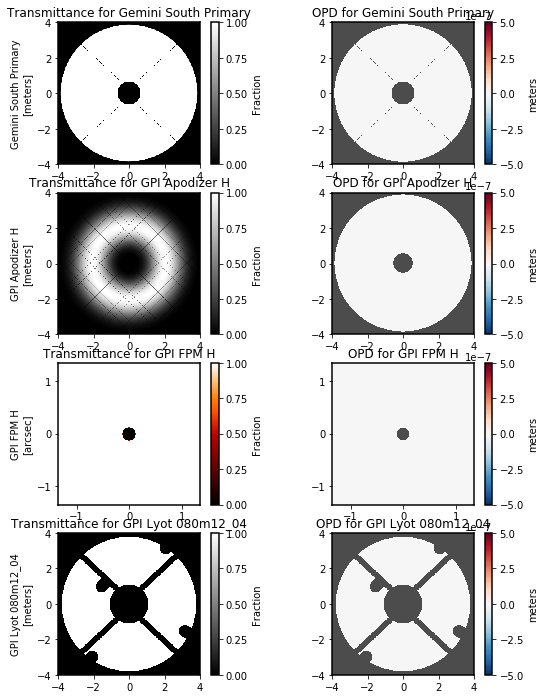

In [4]:
plt.figure(figsize=(9,12))
gpi.display()

And make PSFs and display them. 

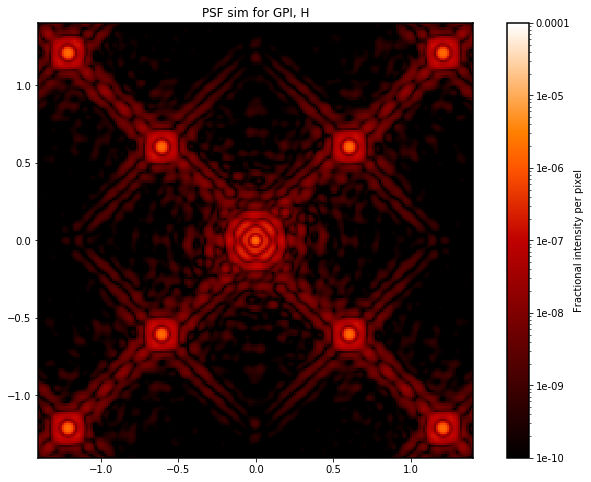

In [5]:
psf_h = gpi.calc_psf(monochromatic=1.6e-6)   #wavelengths are always given in **meters**
gpipsfs.display_psf(psf_h, vmax=1e-4, vmin=1e-10)  # note these are somewhat arbitrary units, NOT contrast!

It is also possible to display the wavefront at each step of propagating through the system.

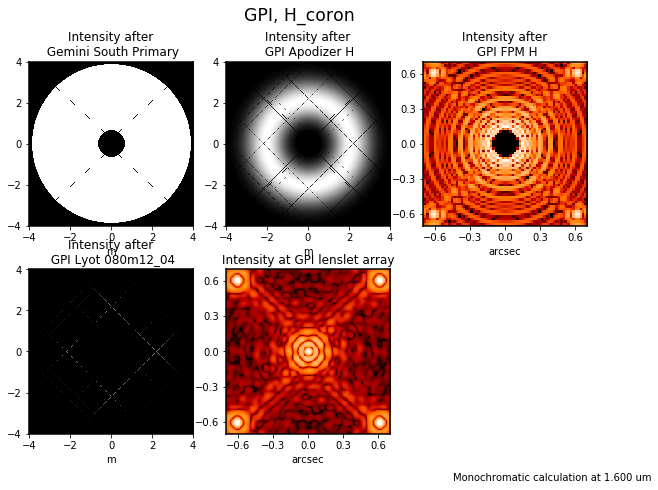

In [6]:
plt.figure(figsize=(10,7))
psf_h = gpi.calc_psf(monochromatic=1.6e-6, display=True)

# Components in the GPI Coronagraph

The next part of this notebook shows off all the various components that are available in this GPI simulator right now. 

This is sort of just a catalog. To learn more about _why_ these components are included in GPI, see the Tutorial on Coronagraphs notebook. 


## Available Obsmodes

In [7]:
print(gpi.obsmode_list)

['DARK', 'H_LIWAcor', 'H_coron', 'H_direct', 'H_starcor', 'H_unblocked', 'J_coron', 'J_direct', 'J_unblocked', 'K1_coron', 'K1_direct', 'K1_unblocked', 'K2_coron', 'K2_direct', 'K2_unblocked', 'NRM_H', 'NRM_J', 'NRM_K1', 'NRM_K2', 'NRM_Y', 'Y_coron', 'Y_direct', 'Y_unblocked']


## Gemini Primary

Text(0.5, 1.0, 'Gemini South Primary')

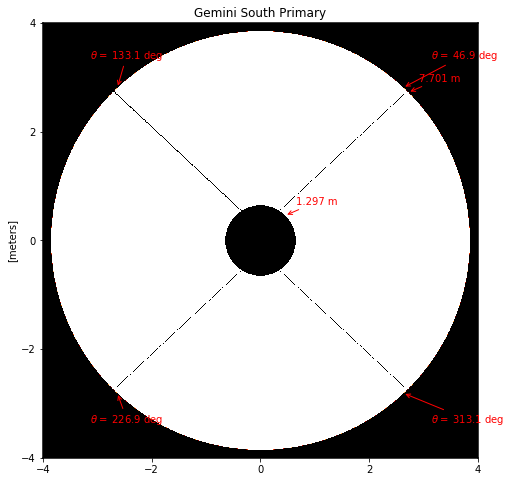

In [10]:
GS = gpipsfs.GeminiPrimary()
plt.figure(figsize=(10,8))
GS.display(npix=2048, colorbar=False, crosshairs=False, annotate=True)
plt.title(GS.name)
# note that the upper left secondary support really is thicker 
# than the other 3 due to the laser transfer path for GEMS. ;

## Apodizers

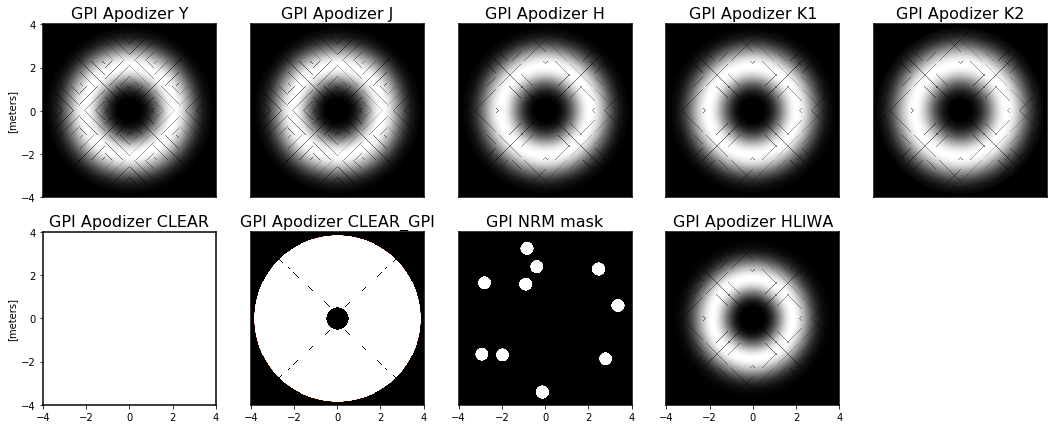

In [11]:
plt.figure(figsize=(18,7))
available_apodizers = ['Y', 'J', 'H', 'K1', 'K2', 'CLEAR', 'CLEAR_GPI', 'NRM', 'HLIWA']

for i,name in enumerate(available_apodizers):
    apod= gpipsfs.GPI_Apodizer(name)
    ax=plt.subplot(2,5,1+i)
    apod.display(npix=512,ax=ax, colorbar=False,crosshairs=False)
    plt.title(apod.name, fontsize=16)
    if np.mod(i,5) !=0 : 
        ax.yaxis.set_visible(False)
    if i < 5:
        ax.xaxis.set_visible(False)


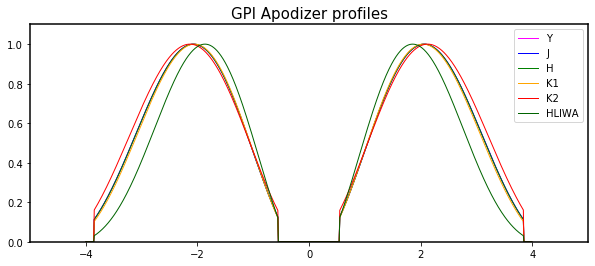

In [12]:
plt.figure(figsize=(10,4))
for apod, color in zip(['Y', 'J', 'H', 'K1', 'K2','HLIWA'],
                       ['magenta','blue','green','orange','red','darkgreen']):
    apod_array = gpipsfs.GPI_Apodizer(apod,satspots=False).sample(npix=800)
    x = np.arange(800)*0.01-4.0 # meters across the pupil
    plt.plot(x,apod_array[400],  color=color, label=apod)
ax=plt.gca()
ax.set_xlim(-5,5)
ax.set_ylim(0, 1.1)
plt.legend(loc='upper right')
plt.title('GPI Apodizer profiles', fontsize=15);


## Focal Plane Masks

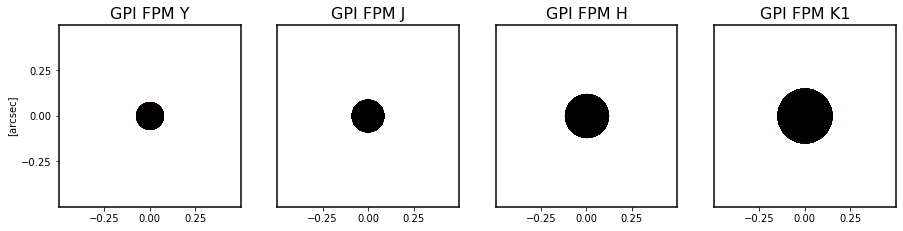

In [13]:
plt.figure(figsize=(15,6))
available_fpms = ['Y','J','H',"K1"]
for i,name in enumerate(available_fpms):
    fpm= gpipsfs.GPI_FPM(name)
    ax=plt.subplot(1,4,1+i)
    fpm.display(npix=4096,ax=ax, colorbar=False,crosshairs=False)
    ax.set_xlim(-0.5,0.5)
    ax.set_ylim(-0.5,0.5)
    ax.set_xticks([-0.25, 0, 0.25])
    ax.set_yticks([-0.25, 0, 0.25])
    plt.title(fpm.name, fontsize=16)
    if i > 0: 
        ax.yaxis.set_visible(False)
        

## Lyot Masks

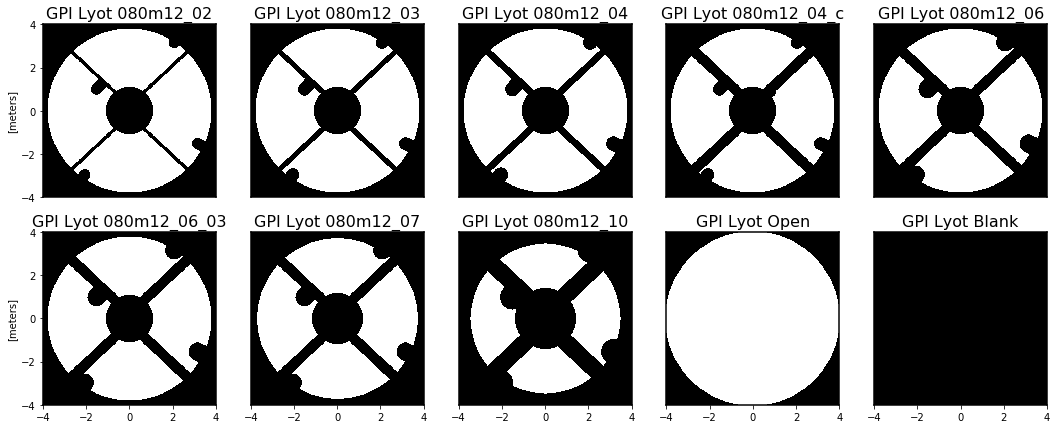

In [14]:
plt.figure(figsize=(18,7))
available_lyots = gpi.lyotmask_list

for i,name in enumerate(available_lyots):
    lyot= gpipsfs.GPI_LyotMask(name)
    ax=plt.subplot(2,5,1+i)
    lyot.display(npix=512,ax=ax, colorbar=False,crosshairs=False)
    plt.title(lyot.name, fontsize=16)
    if np.mod(i,5) !=0 : 
        ax.yaxis.set_visible(False)
    if i < 5:
        ax.xaxis.set_visible(False)

## Other Tricks with Optics

If you want to overplot combinations of various optics, that's pretty straightforward.  You can sample any optic onto a discrete array via the `sample` method.

[  poppy] Computing amplitude for Gemini South Primary sampled onto 1024 pixel grid with pixelscale 0.0078125 m / pix
[  poppy] Computing amplitude for GPI Lyot 080m12_04 sampled onto 1024 pixel grid with pixelscale 0.0078125 m / pix


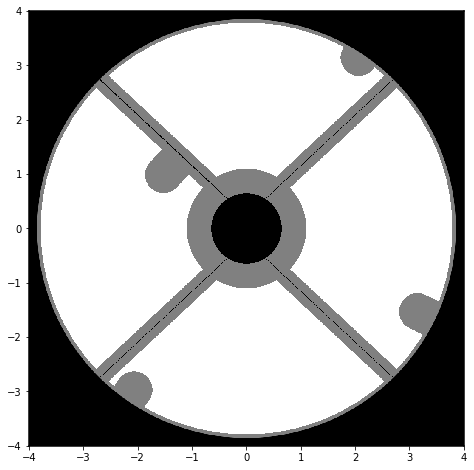

In [18]:
primary = gpipsfs.GeminiPrimary().sample(npix=1024)
lyot = gpipsfs.GPI_LyotMask('080m12_04').sample(npix=1024)

plt.imshow(primary+lyot, extent=[-4,4,-4,4], cmap=matplotlib.cm.gray);
